Table of Content 
- [Problem Objective](#1)
- [Exploratory data analysis](#2)
   - [Information About DataFrame](#2.1)
   - [Detecting missing data](#2.2)
   - [Detecting outliers](#2.3)
   - [Correlation analysis](#2.4)
- [Cleaning and Preparing the data](#3)
   - [Feature Selection](#3.1)
   - [Dealing with missing data](#3.2)
   - [Dealing with outliers](#3.3)
   - [Feature Encoding](#3.4)
- [Model Building and Enhancing](#4)
   - [Linear Regression](#4.1)
   - [KNN Regressor](#4.2)
   - [Lasso](#4.3)
   - [Ridge](#4.4)
   - [Other models](#4.5)
- [Model Evaluation](#5)
   - [Comparing the models](#5.1)
- [Feature importance](#6)
- [Model Deployment](#7)
   - [Saving the model](#8)

<h1 id="1" style ="color:salmon;">Problem Objective</h1>

>With <span style="color:red">80</span> explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you <span style="color:red">to predict the final price of each home.</span>

<details>
  <summary>Column Descriptions</summary>

- <span style="color:red">SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.</span>
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on the house
- Exterior2nd: Exterior covering on the house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low-quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year the garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of the garage in car capacity
- GarageArea: Size of the garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three-season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous features
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

</details>


<h1 id="2" style ="color:salmon;">Exploratory data analysis</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

<h2 id="2.1">Information about DataFrame</h2>


In [2]:
# reading the dataset 
houses = pd.read_csv("DataSet/train.csv")
display(f"shape of the dataset {houses.shape}", houses.head(3))

'shape of the dataset (1460, 81)'

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [3]:
# some info about the dataset
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# describe the dataset
houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# houses describe object columns
houses.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


<h2 id="2.2">Detecting missing data</h2>

In [6]:
# missing columns in all houses
missing_data = houses.isnull().sum().sort_values(ascending=False)

# percent missing_data in each column
percent = (houses.isnull().sum()/houses.isnull().count()).sort_values(ascending=False)

# selecting only the columns with missing data 
missing_columns = missing_data[missing_data > 0]

# Display columns with missing data
missing_data = pd.concat([missing_data, percent], axis=1, keys=['Total', 'Percent'])
# sorting those columns to see who have the most missing data
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [7]:
# Exploring the types of the columns that have missing data
houses.loc[:, missing_columns.index].dtypes

PoolQC           object
MiscFeature      object
Alley            object
Fence            object
MasVnrType       object
FireplaceQu      object
LotFrontage     float64
GarageYrBlt     float64
GarageCond       object
GarageType       object
GarageFinish     object
GarageQual       object
BsmtFinType2     object
BsmtExposure     object
BsmtQual         object
BsmtCond         object
BsmtFinType1     object
MasVnrArea      float64
Electrical       object
dtype: object

<h2 id="2.3">Detecting outliers</h2>

In [8]:
houses.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
# length of columns that have number data type
houses.drop(columns="Id").select_dtypes(include=['number']).columns.shape[0]

37

this plot show the outoutliers in each column


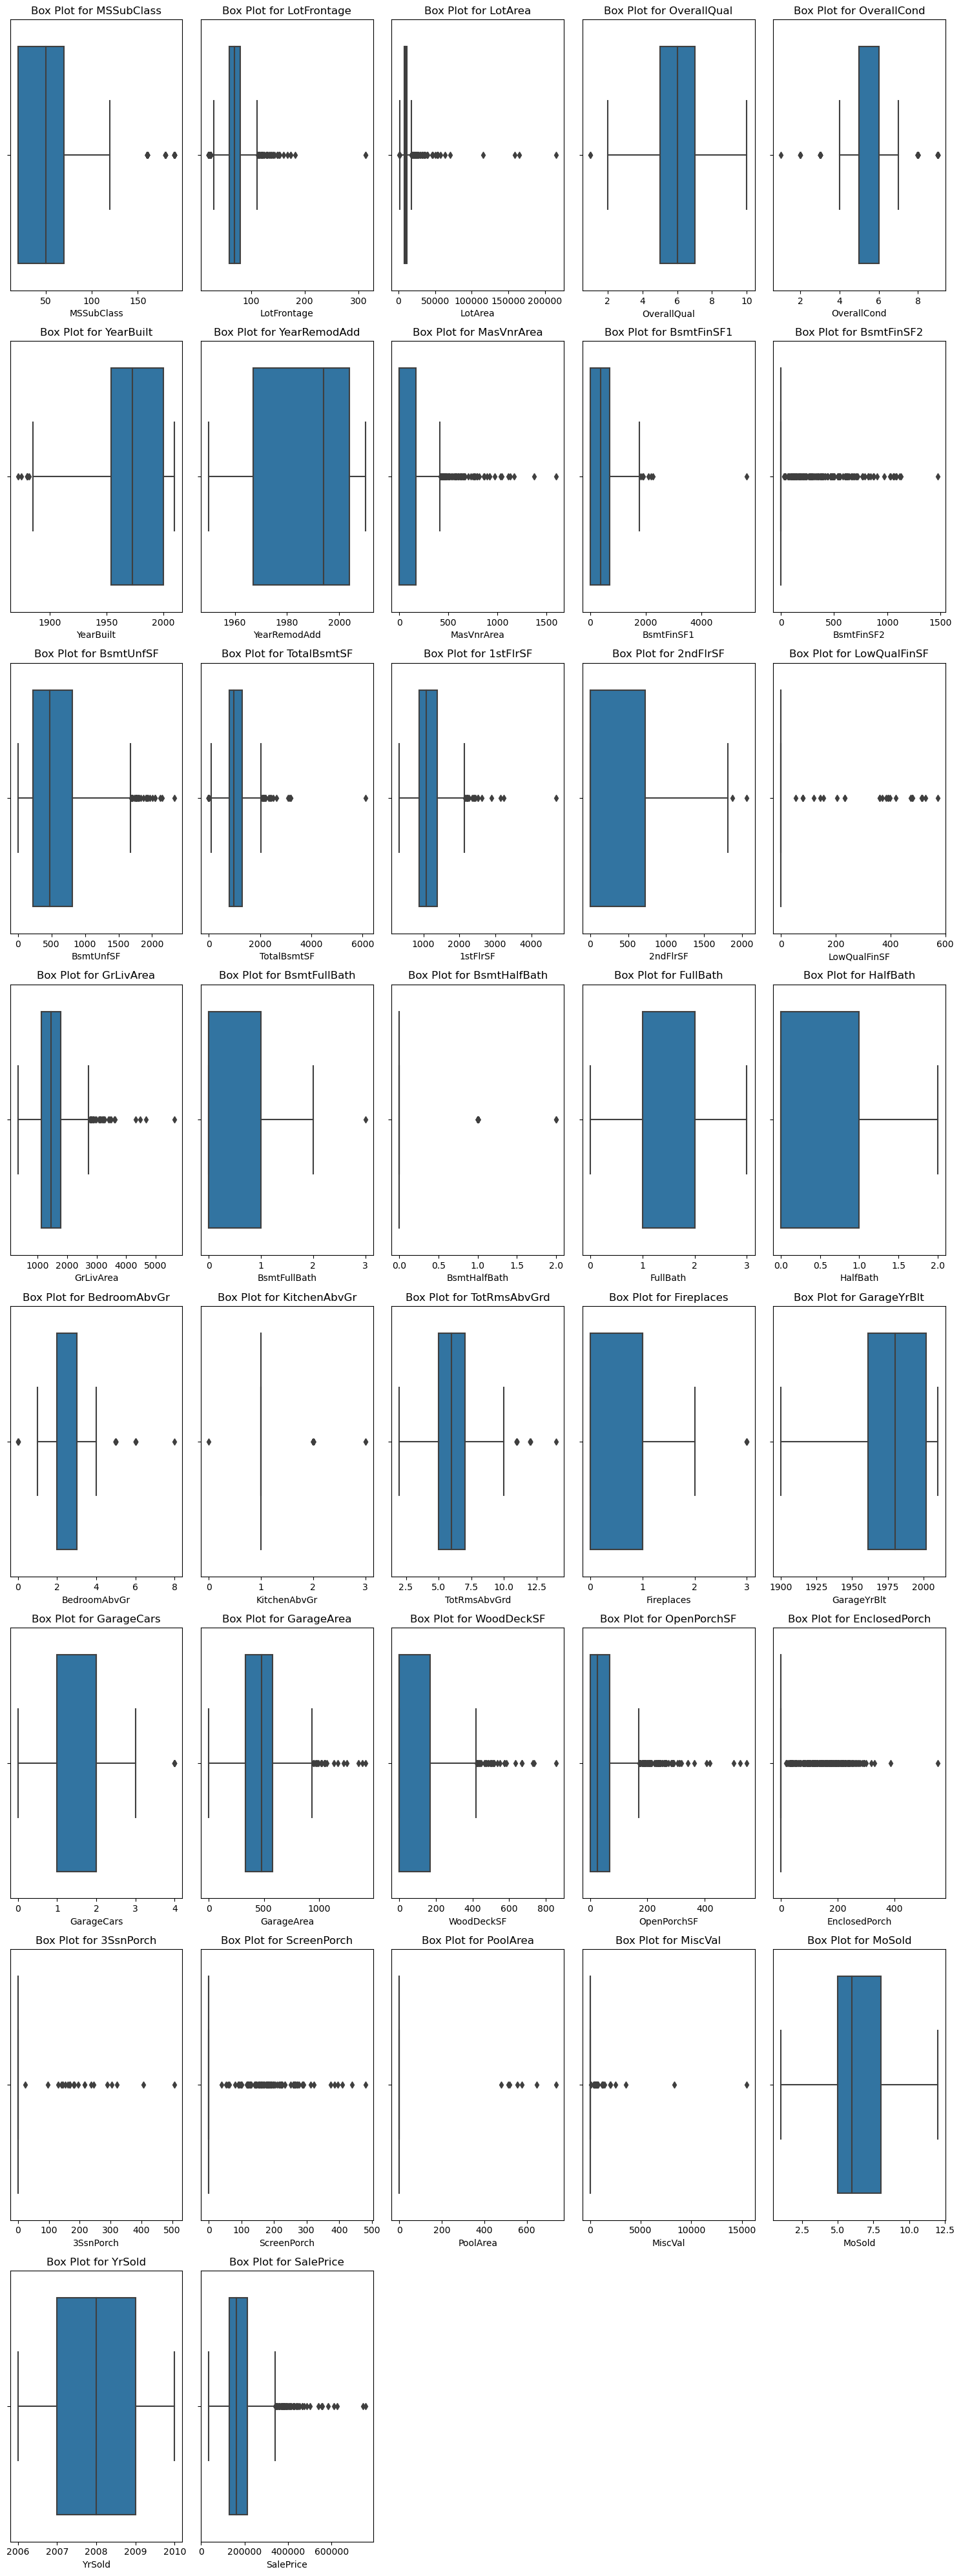

In [10]:
print("this plot show the outoutliers in each column")

# Select only numerical features
numerical_features = houses.drop(columns="Id").select_dtypes(include=['number'])

# Determine the number of rows and columns for the grid layout
num_features = len(numerical_features.columns)
num_rows = 8  # Set the number of rows
num_cols = 5  # Set the number of columns

# Calculate the figure size based on the number of rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 40))

# Flatten the axes array to simplify indexing
'''
subplot returns a 2D index matrix to access the figures so when we flatten it inot 1D it's easier to access  
'''
axes = axes.flatten()

# Iterate over numerical features and create individual box plots in subplots
for i, column in enumerate(numerical_features.columns):
    if i < num_features:
        sns.boxplot(x=houses[column], ax=axes[i])
        axes[i].set_title(f'Box Plot for {column}')


# Remove empty subplots (8*5 = 40 but we have only 37 features to plot)
for i in range(len(numerical_features.columns), len(axes)):
    fig.delaxes(axes[i])
    
# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

<h2 id="2.4">Correlation analysis</h2>

In [11]:
houses.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
houses.drop(columns="Id").select_dtypes(include=['number']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

<Axes: >

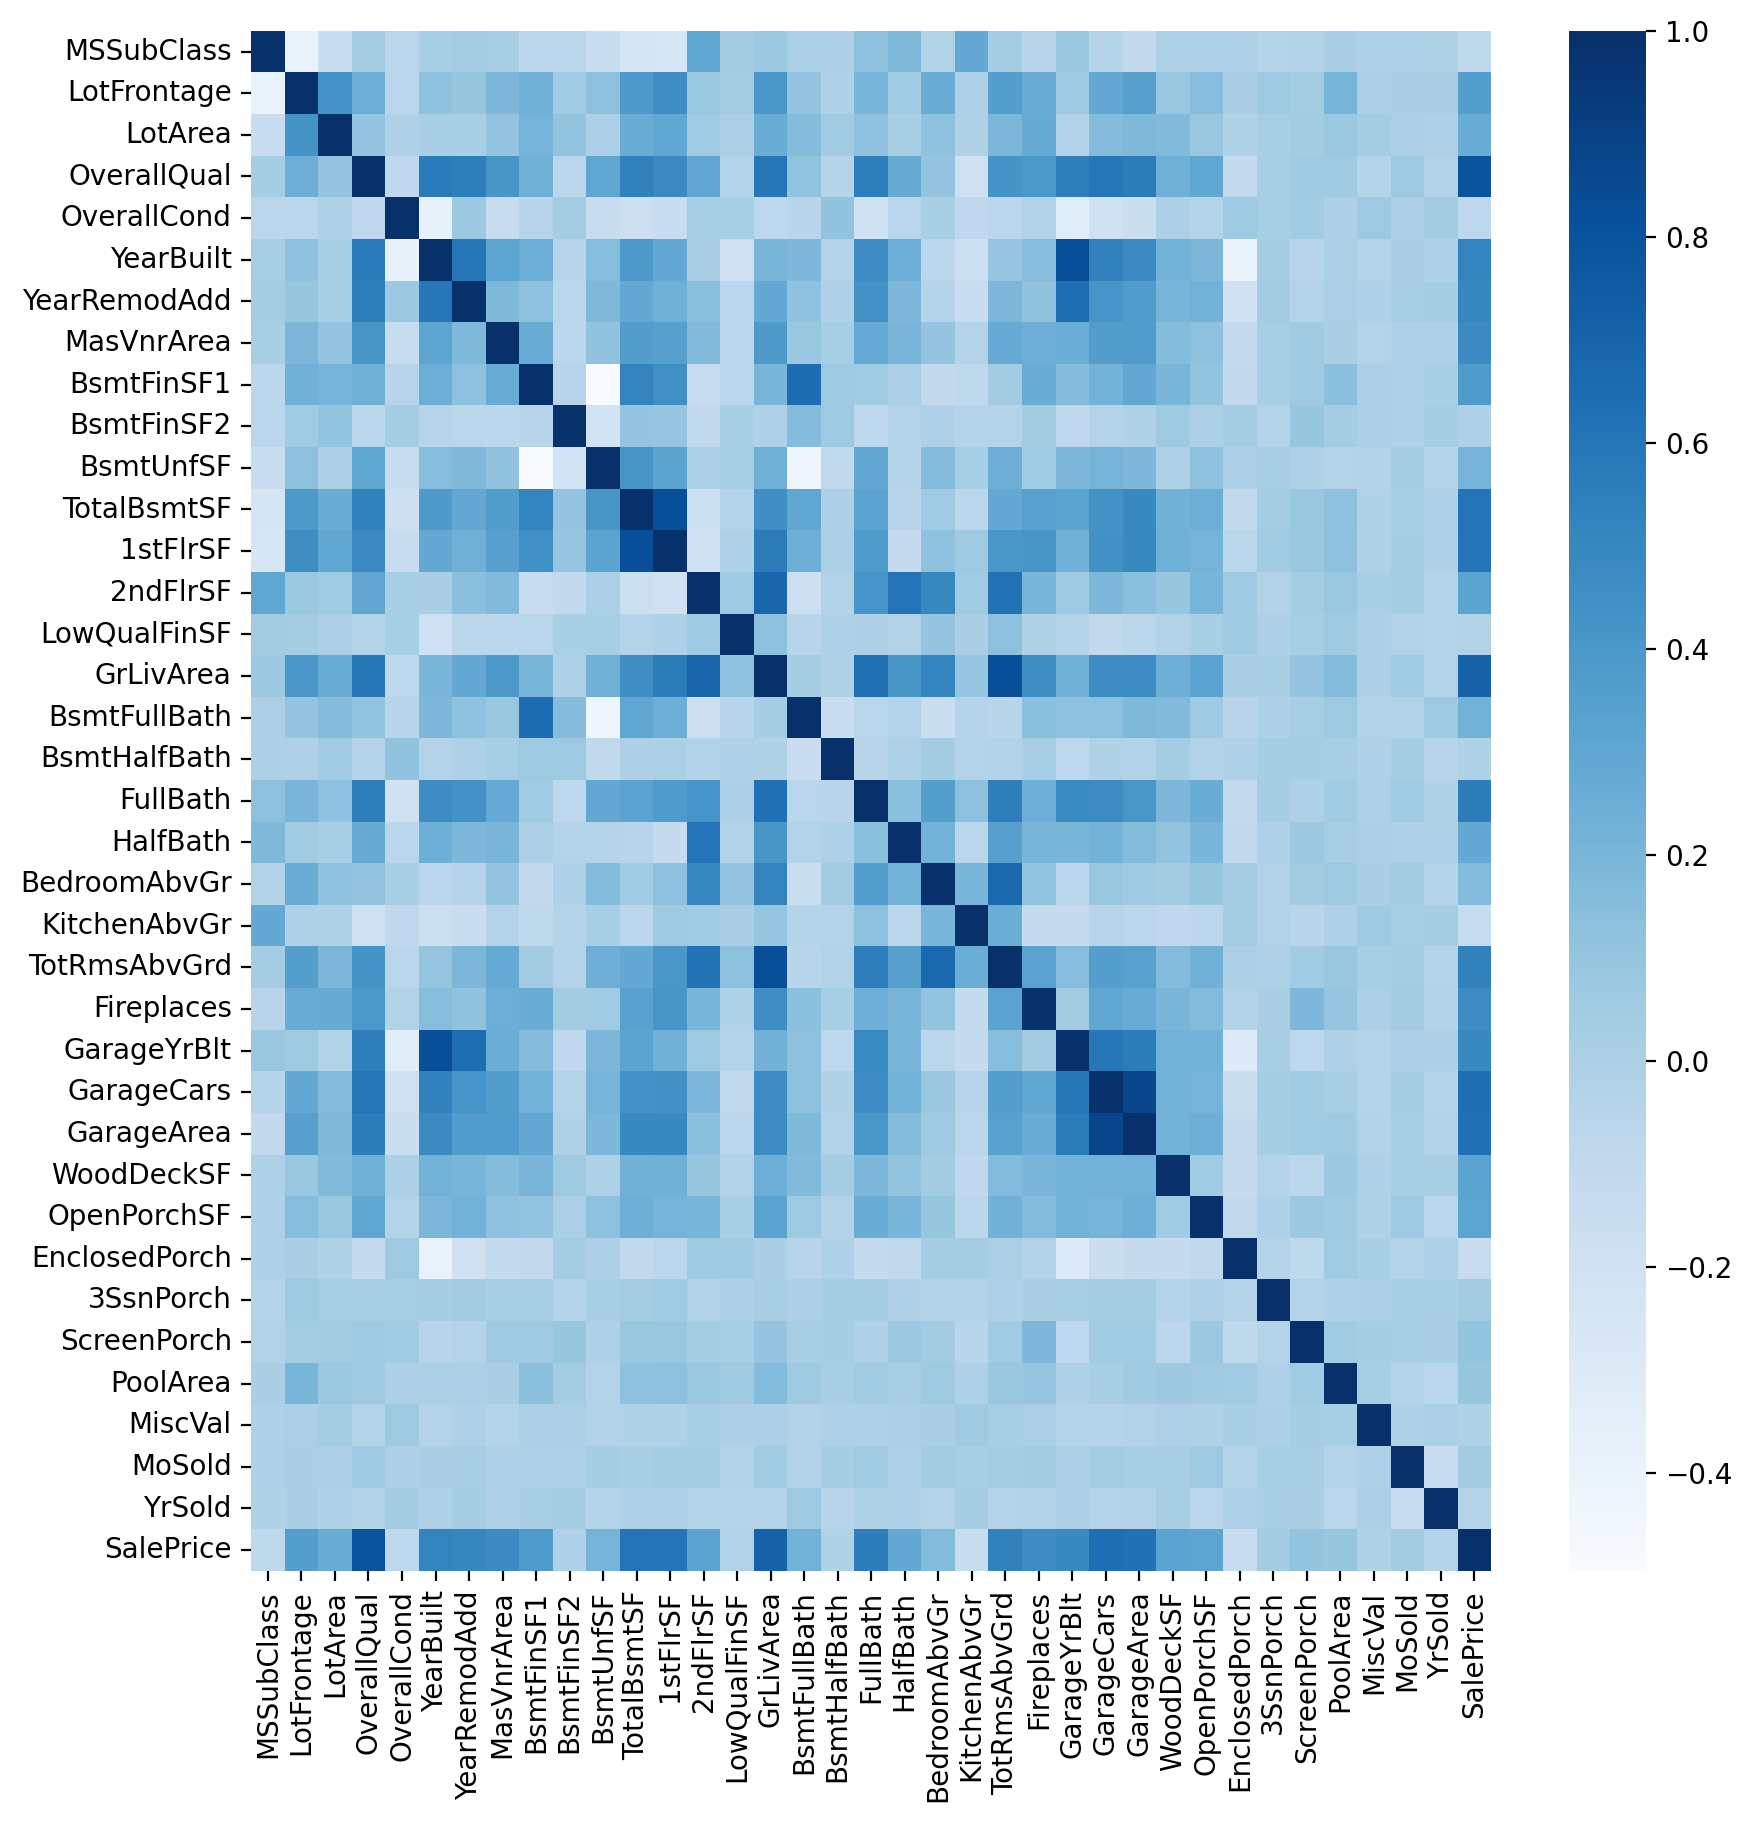

In [13]:
# correlation matrix 
corr = houses.drop(columns='Id').corr(numeric_only=True)

# figure settings
plt.figure(figsize=(10,10), dpi=200)

# corr matrix "heatmap"
sns.heatmap(corr, cmap="Blues")

In [14]:
correlation=corr["SalePrice"].apply(abs).sort_values(ascending=False).reset_index()
print(correlation.shape)
correlation

(37, 2)


,index,SalePrice
0,SalePrice,1.000000
1,OverallQual,0.790982
2,GrLivArea,0.708624
3,GarageCars,0.640409
4,GarageArea,0.623431
5,TotalBsmtSF,0.613581
6,1stFlrSF,0.605852
7,FullBath,0.560664
8,TotRmsAbvGrd,0.533723
9,YearBuilt,0.522897


<h1 id="3" style="color:salmon">Cleaning and Preparing the data<h1>

<h2 id="3.1">Feature Selection</h2>

In [15]:
houses = houses.drop((missing_data[missing_data['Total'] > 81]).index,axis=1) # will remove 7 feature
houses = houses.drop(houses.loc[houses['Electrical'].isnull()].index) # remove one row that contain NaN
print(f"shap after delete columns that has NaN greater than 81 value: {houses.shape}")
houses.isnull().sum().max() #just checking that there's no missing data missing...

shap after delete columns that has NaN greater than 81 value: (1459, 74)


81

In [16]:
print(f"before delete weak correlation => {houses.shape}")
houses = houses.drop(correlation.iloc[21: , 0].values,axis=1)
print(f"after delete weak correlation => {houses.shape}")

before delete weak correlation => (1459, 74)
after delete weak correlation => (1459, 58)


<h2 id="3.2">Dealing with missing data</h2>

#### fillna in each numerical cloumn

In [17]:
# find name of columns that has dtypes => number
name_of_coll = houses.drop(columns="Id").select_dtypes(include=['number']).columns

# fillna in each column using sample()
for col in name_of_coll :
    nan_indices = houses[col].isnull() # find place(index) of NaN
    random_samples = houses[col].dropna().sample(n=nan_indices.sum(), replace=True) # sample of coll without NaN
    houses.loc[nan_indices, col] = random_samples.values

# show sum of NaN in each column
col_has_numbers = houses.drop(columns="Id").select_dtypes(include=['number'])
col_has_numbers.isnull().sum().sort_values(ascending=False)

LotArea         0
OverallQual     0
OpenPorchSF     0
WoodDeckSF      0
GarageArea      0
GarageCars      0
GarageYrBlt     0
Fireplaces      0
TotRmsAbvGrd    0
HalfBath        0
FullBath        0
GrLivArea       0
2ndFlrSF        0
1stFlrSF        0
TotalBsmtSF     0
BsmtFinSF1      0
MasVnrArea      0
YearRemodAdd    0
YearBuilt       0
SalePrice       0
dtype: int64

#### fillna in each object cloumn

In [18]:
name_of_coll = houses.drop(columns="Id").select_dtypes(include=['object']).columns

for col in name_of_coll :
    # using mode()
    mode_for_coll = houses[col].mode()[0]
    houses[col].fillna(mode_for_coll, inplace=True)
    
# show sum of NaN in each column
col_has_numbers = houses.drop(columns="Id").select_dtypes(include=['object'])
col_has_numbers.isnull().sum().sort_values(ascending=False)

MSZoning         0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
BsmtCond         0
Foundation       0
Street           0
ExterCond        0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
SaleCondition    0
dtype: int64

<h2 id="3.3">Dealing with outliers</h2>

In [19]:
def handle_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = dataframe[(dataframe[column] < lower) | (dataframe[column] > upper)]
    dataframe.loc[(dataframe[col]>upper,col)]=upper
    dataframe.loc[(dataframe[col]<lower,col)]=lower 
    # np.where(condition, if True excute this, NO excute this)
    # dataframe[column] = np.where((dataframe[column] < lower) | (dataframe[column] > upper), dataframe[column].median(), dataframe[column])
    return dataframe


for col in houses.drop(columns="Id").select_dtypes(include=["number"]).columns :
    houses = handle_outliers_iqr(houses, col)

this plot show the outoutliers in each column After delete them


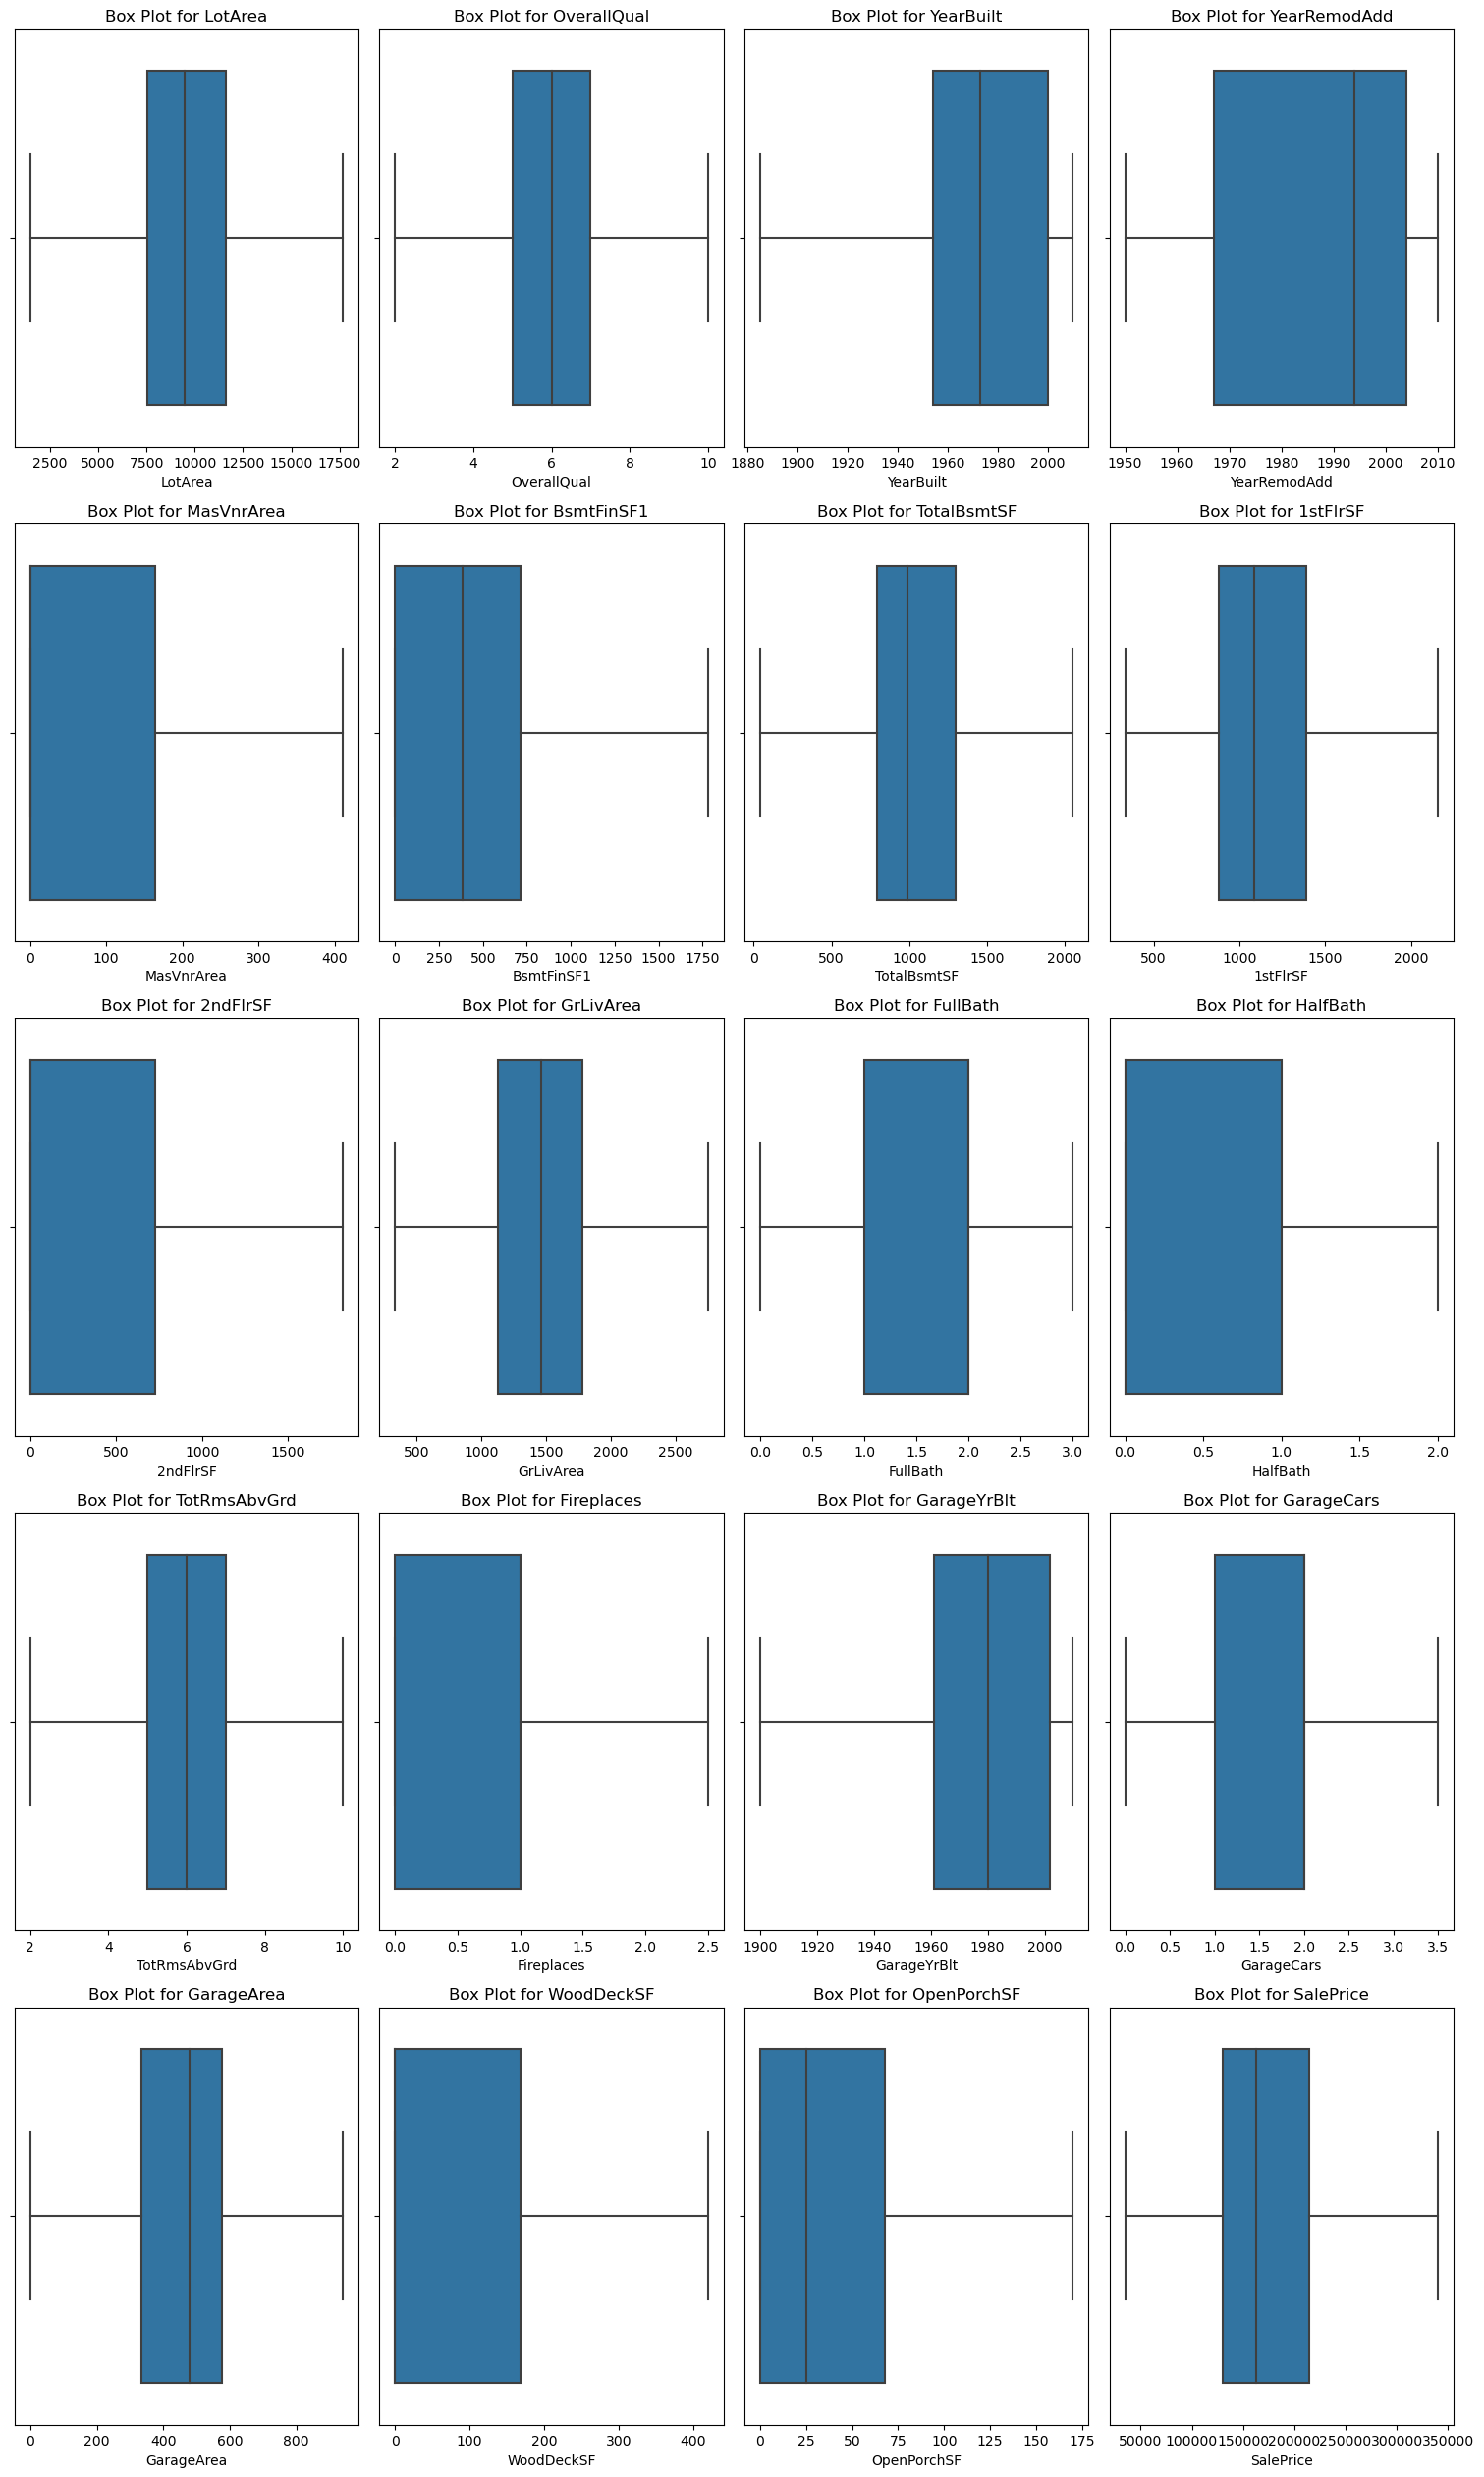

In [20]:
print("this plot show the outoutliers in each column After delete them")

# Select only numerical features
numerical_features = houses.drop(columns="Id").select_dtypes(include=['number'])
# Determine the number of rows and columns for the grid layout
num_features = len(numerical_features.columns)
num_rows = 8  # Set the number of rows
num_cols = 4  # Set the number of columns

# Calculate the figure size based on the number of rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 40))

# Flatten the axes array to simplify indexing
'''
subplot returns a 2D index matrix to access the figures so when we flatten it inot 1D it's easier to access  
'''
axes = axes.flatten()

# Iterate over numerical features and create individual box plots in subplots
for i, column in enumerate(numerical_features.columns):
    if i < num_features:
        sns.boxplot(x=houses[column], ax=axes[i])
        axes[i].set_title(f'Box Plot for {column}')


# Remove empty subplots (8*5 = 40 but we have only 37 features to plot)
for i in range(len(numerical_features.columns), len(axes)):
    fig.delaxes(axes[i])
    
# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

<h2 id="3.3">Feature Encoding</h2>

In [21]:
# object (text) columns
obj_col = houses.drop(columns="Id").select_dtypes(include=['object']).columns
obj_col = pd.DataFrame(obj_col,columns=["text col"])
print(f"number of column that have text => {obj_col.shape}")
obj_col

number of column that have text => (37, 1)


,text col
0,MSZoning
1,Street
2,LotShape
3,LandContour
4,Utilities
5,LotConfig
6,LandSlope
7,Neighborhood
8,Condition1
9,Condition2


In [22]:
# using labelEncoder to convert objects
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in obj_col.values.flatten():
    houses[col]= encoder.fit_transform(houses[col])

In [23]:
# df_train.drop(columns="Id").select_dtypes(include=['object']).columns # return empty list becouse converted text to numercal
houses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSZoning       1459 non-null   int32  
 2   LotArea        1459 non-null   int64  
 3   Street         1459 non-null   int32  
 4   LotShape       1459 non-null   int32  
 5   LandContour    1459 non-null   int32  
 6   Utilities      1459 non-null   int32  
 7   LotConfig      1459 non-null   int32  
 8   LandSlope      1459 non-null   int32  
 9   Neighborhood   1459 non-null   int32  
 10  Condition1     1459 non-null   int32  
 11  Condition2     1459 non-null   int32  
 12  BldgType       1459 non-null   int32  
 13  HouseStyle     1459 non-null   int32  
 14  OverallQual    1459 non-null   int64  
 15  YearBuilt      1459 non-null   int64  
 16  YearRemodAdd   1459 non-null   float64
 17  RoofStyle      1459 non-null   int32  
 18  RoofMatl     

<h1 id="4" style ="color:salmon;">Model Building and Enhancing</h1>


<h2 id="4.1">Linear Regression</h2>

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score, KFold, train_test_split

In [25]:
# split data to features and target 
X = houses.iloc[:, :-1].values
y = houses.iloc[:, -1:].values

# split data to train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [26]:
# standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True,with_std=True)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Cross-validated scores
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(LinearRegression(), X_train, y_train, cv=cv)
print("Cross-validated scores:", scores)
print(f"Mean Cross-validated-accuracy: {scores.mean()}")

Cross-validated scores: [0.89275214 0.87584649 0.85291951 0.85036574 0.86308639]
Mean Cross-validated-accuracy: 0.866994054477432


In [28]:
# create and train LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [29]:
# score for train 
print(f"train score: {model.score(X_train, y_train)}")
# score for test 
print(f"test score: {model.score(X_test, y_test)}")

train score: 0.8859825198328786
test score: 0.9006849131026232


In [30]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE is the square root of MSE
print(f"\nMean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 16982.822406532552
Mean Squared Error: 490282624.3655529
Root Mean Squared Error: 22142.326534615844


In [31]:
# final accuracy 
r2 = r2_score(y_test, y_pred)
print(f"Coefficient of Determination (R^2): {r2}")

Coefficient of Determination (R^2): 0.9006849131026232


<h2 id="4.2">knnRegressor</h2>

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [44]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              "p" : [1,2]}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(best_params)

{'n_neighbors': 11, 'p': 1}


In [46]:
# Create and train the KNN regression model
knn_model = grid_search.best_estimator_
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

In [48]:
# Cross-Validation
scores = cross_val_score(knn_model, X_train, y_train, cv=5)
average_score = scores.mean()
print(f"Cross-Validation score:{average_score}")

Cross-Validation score:0.8377984480640563


In [53]:
pd.DataFrame(grid_search.cv_results_).to_csv("grid_search_KNN.csv")
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001502,0.000641,0.091422,0.011170,3,1,"{'n_neighbors': 3, 'p': 1}",0.834313,0.796517,0.789940,0.821402,0.829476,0.814330,0.017838,9
1,0.001420,0.000516,0.077394,0.003633,3,2,"{'n_neighbors': 3, 'p': 2}",0.796342,0.793149,0.767087,0.780779,0.823864,0.792244,0.018877,10
2,0.001034,0.000688,0.081087,0.005576,5,1,"{'n_neighbors': 5, 'p': 1}",0.848829,0.813526,0.810086,0.835199,0.838968,0.829321,0.015017,4
3,0.001159,0.000494,0.081376,0.016497,5,2,"{'n_neighbors': 5, 'p': 2}",0.823883,0.804121,0.816692,0.790422,0.837200,0.814464,0.016097,8
4,0.000319,0.000411,0.190395,0.225962,7,1,"{'n_neighbors': 7, 'p': 1}",0.850892,0.813582,0.809568,0.835441,0.857428,0.833382,0.019226,3
5,0.001855,0.000658,0.104716,0.004972,7,2,"{'n_neighbors': 7, 'p': 2}",0.818310,0.805494,0.813460,0.802578,0.838557,0.815680,0.012733,7
6,0.001774,0.000688,0.104557,0.004422,9,1,"{'n_neighbors': 9, 'p': 1}",0.853516,0.814858,0.814162,0.836822,0.856603,0.835192,0.018180,2
7,0.001262,0.000818,0.075124,0.003418,9,2,"{'n_neighbors': 9, 'p': 2}",0.824629,0.804258,0.813474,0.820154,0.843346,0.821172,0.013039,5
8,0.001308,0.000408,0.082939,0.002997,11,1,"{'n_neighbors': 11, 'p': 1}",0.851838,0.813249,0.815915,0.846604,0.861386,0.837798,0.019558,1
9,0.000619,0.000834,0.075230,0.003952,11,2,"{'n_neighbors': 11, 'p': 2}",0.827978,0.805597,0.810575,0.815405,0.839721,0.819855,0.012408,6


In [49]:
# Evaluate the model
ae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE is the square root of MSE
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 16982.822406532552
Mean Squared Error: 660022806.3397712
Root Mean Squared Error: 25690.909021281655


In [50]:
r2 = r2_score(y_test, y_pred)
print(f"Coefficient of Determination (R^2): {r2}")

Coefficient of Determination (R^2): 0.8663011514007667


In [54]:
test_houses = pd.read_csv("DataSet/test.csv")